# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 21.09.2020

Мягкий дедлайн: 02:59MSK 05.10.2020

Жесткий дедлайн: 23:59MSK 08.10.2020

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [1]:
#%%bash
#pip3 install ipyleaflet
#jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [2]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math as m
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
df = pd.read_csv('train.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [5]:
df.drop('dropoff_datetime', axis=1, inplace=True)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [6]:
Y = df['trip_duration']
X = df.drop(columns=['trip_duration'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train = x_train.copy()
X_test = x_test.copy()
Y_train = y_train.copy()
Y_test = y_test.copy()

Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

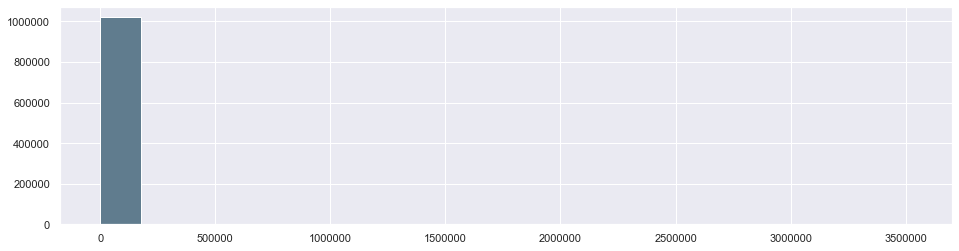

In [7]:
fig, axs = plt.subplots(figsize=(16, 4))
n, bins, patches = plt.hist(x=Y_train, bins=20, color='#607c8e')
plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: То что все ее значения примерно одинаковые

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ**: Потому что с ее помощью удается уменьшить результат MSE

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**:

Запишем MSE  и подставим туда $ \hat{y} = \log{(y + 1)}, \hat{a} = \log{(a + 1)}$

$$\text{MSE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}- \hat{a} \big)^2$$
Получим:
$$\text{RMSLE}(X, \hat{y}, \hat{a}) = \frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2$$
Корень является монотонной функцией, следовательно, минимизировать функцию с корнем, тоже самое, что минимизировать такую же функцию без корня.


Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

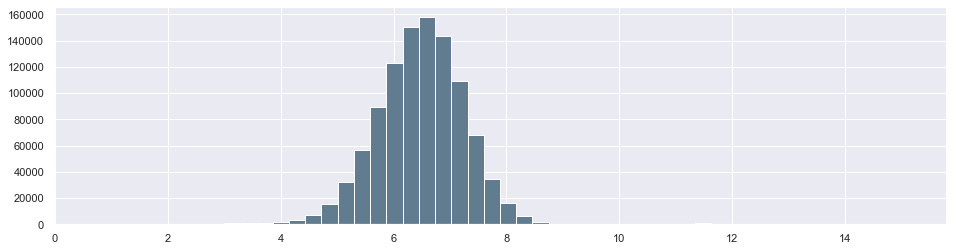

In [8]:
X_train['log_trip_duration'] = np.log1p(df['trip_duration'])
X_test['log_trip_duration'] = np.log1p(df['trip_duration'])
fig, axs = plt.subplots(figsize=(16, 4))
n, bins, patches = plt.hist(x=X_train['log_trip_duration'], bins=50, color='#607c8e')
plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [9]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
best_constant = df['trip_duration'].mean()
print("Test RMSLE with best constant = %.4f" % mean_squared_log_error(Y_test, best_constant * np.ones(Y_test.shape)) ** 0.5)
print("Train RMSLE with best constant = %.4f" % mean_squared_log_error(Y_train, best_constant * np.ones(Y_train.shape)) ** 0.5)

Test RMSLE with best constant = 0.8892
Train RMSLE with best constant = 0.8916


In [10]:
Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)
Y_train_log

824746     7.134891
645821     6.878326
691846     7.642524
1147931    6.888572
183569     6.177944
             ...   
1348317    5.198497
1154171    8.787678
617841     5.023881
1048548    6.079933
1393929    7.148346
Name: trip_duration, Length: 1021050, dtype: float64

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0.5, 1.0, 'Number of trips for days of year')

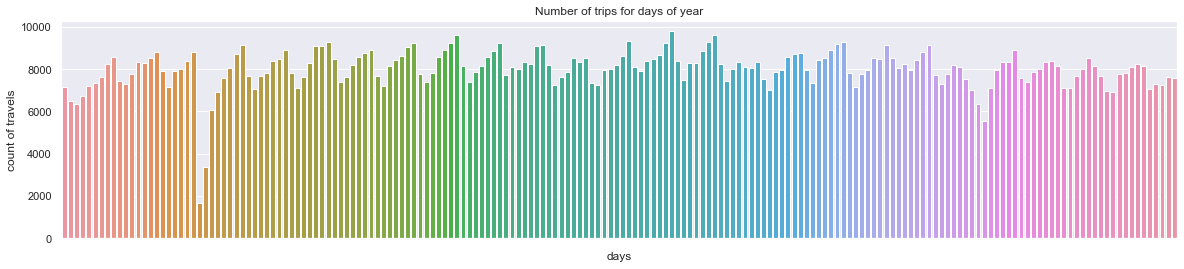

In [11]:
df['days'] = df['pickup_datetime'].map(lambda d: d.dayofyear)
sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.countplot(data=df, x='days')
ax.set(xticklabels=[], xlabel='days', ylabel='count of travels')
plt.title('Number of trips for days of year')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: 22-23 января была плохая погода (снегопад), а 31 мая - день повиновения

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

Text(0.5, 1, 'Number of trips for days of week')

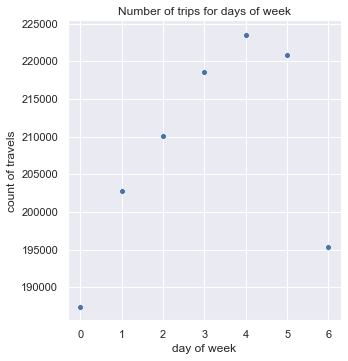

In [12]:
df['day_of_week'] = df['pickup_datetime'].map(lambda d: d.weekday())
lst_cnt = df.groupby('day_of_week').count().copy()
lst_cnt.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=lst_cnt, x='day_of_week', y='id')
ax.set(xlabel='day of week', ylabel='count of travels')
plt.title('Number of trips for days of week')

Text(0.5, 1, 'Number of trips for hours of day')

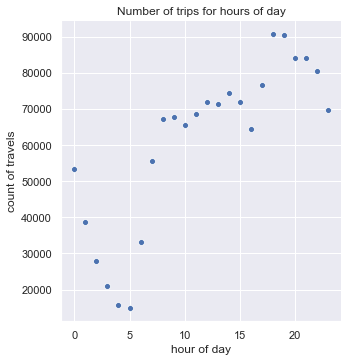

In [13]:
df['hour_of_day'] = df['pickup_datetime'].map(lambda d: d.hour)
hrs_cnt = df.groupby('hour_of_day').count().copy()
hrs_cnt.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=hrs_cnt, x='hour_of_day', y='id')
ax.set(xlabel='hour of day', ylabel='count of travels')
plt.title('Number of trips for hours of day')

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

Text(0.5, 1, 'Number of trips for hours of day')

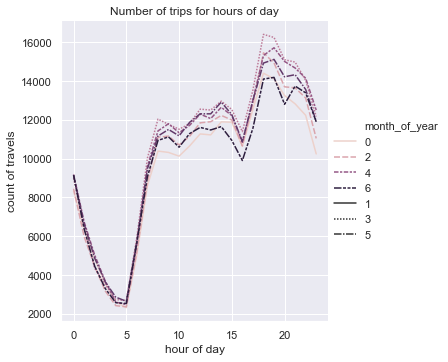

In [14]:
df['month_of_year'] = df['pickup_datetime'].map(lambda d: d.month)
hrs_mnth_cnt = df.groupby(['hour_of_day', 'month_of_year']).count()
hrs_mnth_cnt.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=hrs_mnth_cnt, x='hour_of_day', y='id', kind='line', style='month_of_year', hue = 'month_of_year')
ax.set(xlabel='hour of day', ylabel='count of travels')
plt.title('Number of trips for hours of day')

Text(0.5, 1, 'Number of trips for days to week')

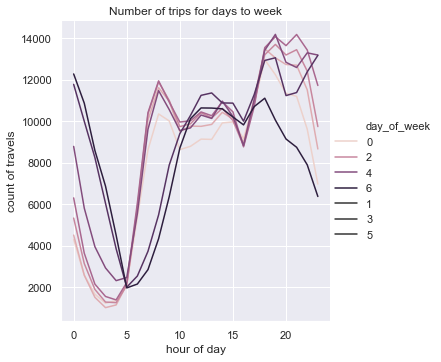

In [15]:
hrs_wknd_cnt = df.groupby(['hour_of_day', 'day_of_week']).count()
hrs_wknd_cnt.reset_index(inplace=True)
hrs_wknd_cnt = hrs_wknd_cnt.loc[:, ['hour_of_day', 'day_of_week', 'id']].copy()

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=hrs_wknd_cnt, x='hour_of_day', y='id', kind='line', style='day_of_week', hue = 'day_of_week', dashes=False)
ax.set(xlabel='hour of day', ylabel='count of travels')
plt.title('Number of trips for days to week')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: Да, выделяются. Отчетливо видно, что, в основном, люди заказывают такси в районе 18-20 часов в пятницу в апреле. Связано это с тем, что люди после работы постоянно куда-то едут

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

Text(0.5, 1, 'log Number of trips for days of week')

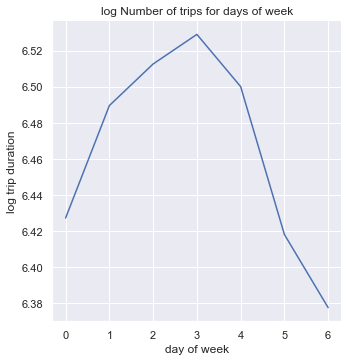

In [16]:
X_train['day_of_week'] = X_train['pickup_datetime'].map(lambda d: d.weekday())
lst_sum = X_train.groupby(['day_of_week']).mean()
lst_sum.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=lst_sum, x='day_of_week', y='log_trip_duration', kind='line')
ax.set(xlabel='day of week', ylabel='log trip duration')
plt.title('log Number of trips for days of week')

Text(0.5, 1, 'log Number of trips for days of week')

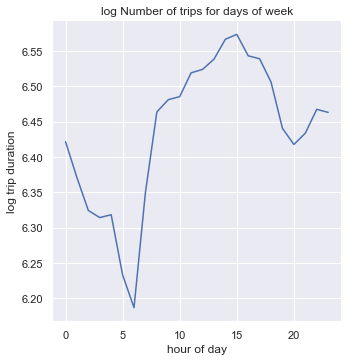

In [17]:
X_train['hour_of_day'] = X_train['pickup_datetime'].map(lambda d: d.hour)
lst_sum = X_train.groupby('hour_of_day').mean()
lst_sum.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=lst_sum, x='hour_of_day', y='log_trip_duration', kind='line')
ax.set(xlabel='hour of day', ylabel='log trip duration')
plt.title('log Number of trips for days of week')

Text(0.5, 1, 'log Number of trips for days of week')

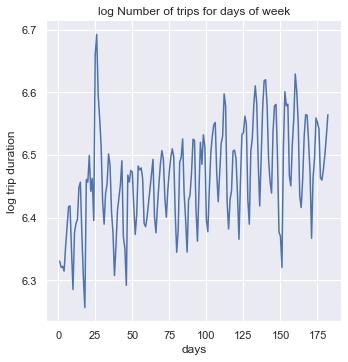

In [18]:
X_train['days'] = X_train['pickup_datetime'].map(lambda d: d.dayofyear)
lst_sum = X_train.groupby('days').mean()
lst_sum.reset_index(inplace=True)

sns.set(rc={'figure.figsize':(20, 4)})
ax = sns.relplot(data=lst_sum, x='days', y='log_trip_duration', kind='line')
ax.set(xlabel='days', ylabel='log trip duration')
plt.title('log Number of trips for days of week')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: Да, похожи, потому что это зависимые величины. В аномальные периоды таргет увеличивается, так как с уменьшением поездок, увеличивается время поездки. Наблюдаются постоянные скачки в длительности поездок.

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [19]:
X_train['month_of_year'] = X_train['pickup_datetime'].map(lambda d: d.month)

In [20]:
X_test['day_of_week'] = X_test['pickup_datetime'].map(lambda d: d.weekday())
X_test['month_of_year'] = X_test['pickup_datetime'].map(lambda d: d.month)
X_test['hour_of_day'] = X_test['pickup_datetime'].map(lambda d: d.hour)
X_test['days'] = X_test['pickup_datetime'].map(lambda d: d.dayofyear)

In [21]:
lst_cnt = X_train.groupby(['days', 'month_of_year']).count()
lst_cnt.reset_index(inplace=True)
lst_cnt.sort_values(by=['id', 'days', 'month_of_year'], inplace=True)
lst_cnt.reset_index(drop=True, inplace=True)
an_per = list(lst_cnt.loc[:2, 'days'])
an_per

[23, 24, 151]

In [22]:
X_train['abnormal_winter'] = False
X_train.loc[X_train['days'] == an_per[0], 'abnormal_winter'] = True
X_train.loc[X_train['days'] == an_per[1], 'abnormal_winter'] = True

X_train['abnormal_spring'] = False
X_train.loc[X_train['days'] == an_per[2], 'abnormal_spring'] = True


X_test['abnormal_winter'] = False
X_test.loc[X_test['days'] == an_per[0], 'abnormal_winter'] = True
X_test.loc[X_test['days'] == an_per[1], 'abnormal_winter'] = True

X_test['abnormal_spring'] = False
X_test.loc[X_test['days'] == an_per[2], 'abnormal_spring'] = True

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

**Ответ**: категориальные признаки - признаки, которые разделяют на категории, т. е. имеют конечное число вариаций, значит: id, vendor_id, store_and_fwd_flag, day_of_week, month_of_year и abnormal - категоральные признаки, остальные - численные (hour_of_day, days)

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [23]:
x_train = X_train.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days']]
x_test = X_test.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days']]

In [24]:
categorical = ['day_of_week', 'month_of_year', 'abnormal_winter', 'abnormal_spring']
numeric_features = ['hour_of_day', 'days']

In [25]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)



print("Test RMSE = %.4f" % mean_squared_error(Y_test_log, y_pred))
print("Train RMSE = %.4f" % mean_squared_error(Y_train_log, y_train_pred))

Test RMSE = 0.6279
Train RMSE = 0.6312


In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test_log, y_pred))

Test MSE = 0.6258


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [27]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [28]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [29]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75116856765747, -73.97240381622315], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [30]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.75209292602539, -73.9720040435791], controls=(ZoomControl(options=['position', 'zoom_in_text', …

**Вопрос**: Какие две точки выделяются на карте?

**Ответ**: Аэропорты JFK и LGA

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [31]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [32]:
X_train.loc[:, 'haversine'] = haversine_array(X_train['pickup_latitude'].values,
                                              X_train['pickup_longitude'].values,
                                              X_train['dropoff_latitude'].values,
                                              X_train['dropoff_longitude'].values)

X_test.loc[:, 'haversine'] = haversine_array(X_test['pickup_latitude'].values,
                                              X_test['pickup_longitude'].values,
                                              X_test['dropoff_latitude'].values,
                                              X_test['dropoff_longitude'].values)

X_train['haversine']

824746     3.593840
645821     4.772773
691846     9.514706
1147931    1.878364
183569     0.684609
             ...   
1348317    0.918456
1154171    1.694346
617841     0.733833
1048548    2.460812
1393929    1.092435
Name: haversine, Length: 1021050, dtype: float64

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [33]:
X_train['haversine_log'] = np.log1p(X_train['haversine'])
X_test['haversine_log'] = np.log1p(X_test['haversine'])

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [34]:
X_train.loc[:, ['haversine', 'haversine_log']].corrwith(X_train['log_trip_duration'])

haversine        0.565512
haversine_log    0.749815
dtype: float64

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

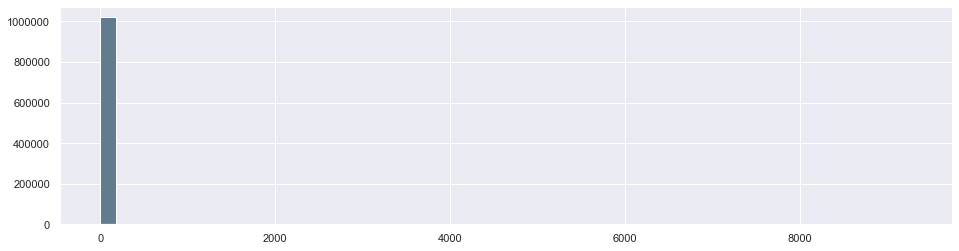

In [35]:
X_train['mid_speed'] = X_train['haversine'] / Y_train
X_train['mid_speed'] *= 3600
X_test['mid_speed'] = X_test['haversine'] / Y_test
X_test['mid_speed'] *= 3600
fig, axs = plt.subplots(figsize=(16, 4))
plt.hist(x=X_train['mid_speed'], bins=50, color='#607c8e')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

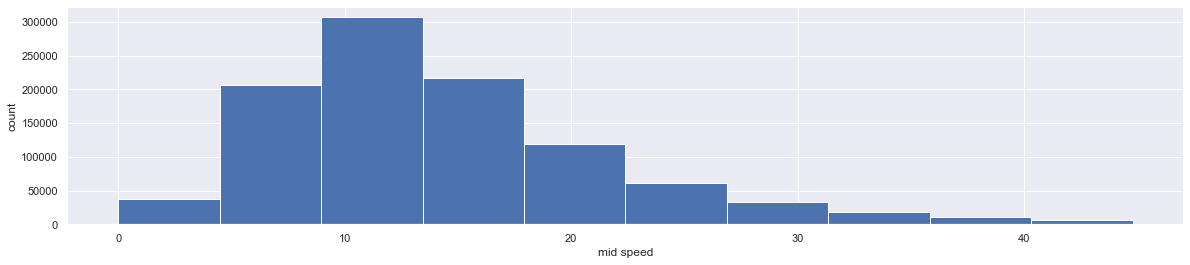

In [36]:
plt.hist(X_train[X_train['mid_speed'] < np.quantile(X_train['mid_speed'], 0.995)]['mid_speed'])
plt.xlabel('mid speed')
plt.ylabel('count')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

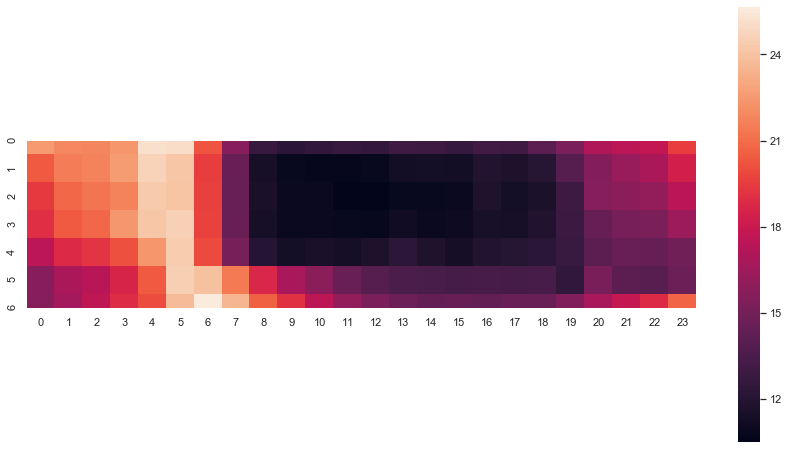

In [37]:
X_med = X_train.loc[:, ['day_of_week', 'hour_of_day', 'mid_speed']].copy()
#X_med = X_test.loc[:, ['day_of_week', 'hour_of_day', 'mid_speed']].copy()
X_med_mean = X_med.groupby(['day_of_week', 'hour_of_day']).mean()
X_med_mean.reset_index(inplace=True)

X_heat = pd.DataFrame(columns=[x for x in range(24)], index=[0, 1, 2, 3, 4, 5, 6])

for i in range(168):
    d = X_med_mean.loc[i, 'day_of_week']
    h = X_med_mean.loc[i, 'hour_of_day']
    v = X_med_mean.loc[i, 'mid_speed']
    X_heat.loc[d, h] = v

for i in range(24):
    X_heat[i] = pd.to_numeric(X_heat[i])

plt.figure(figsize=(15, 8))
sns.heatmap(X_heat, square=True)
plt.show()

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что мы ее не можем знать, так как мы хотим предсказать скорость поездки

In [38]:
X_train.drop('mid_speed', axis=1, inplace=True)
X_test.drop('mid_speed', axis=1, inplace=True)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ**: Скорость достигает максимума в субботу в 6 часов утра, а минимума в среду в 11-12 утра.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

По графику можно заметить, что:

В 0...4 пробки с 8 до 19

В 5, 6 пробки с 14 до 19

где

0 - понедельник, ..., 6 - воскресенье

In [39]:
X_train['traffic_on'] = False
X_train['traffic_off'] = False
X_test['traffic_on'] = False
X_test['traffic_off'] = False


for i in range(5):
    X_train.loc[(X_train['day_of_week'] == i) 
                & ((X_train['hour_of_day'] >= 8) 
                & (X_train['hour_of_day'] <= 17)), 'traffic_on'] = True
    X_train.loc[(X_train['day_of_week'] == i) 
                & ((X_train['hour_of_day'] < 8)
                | (X_train['hour_of_day'] > 17)), 'traffic_off'] = True
    
    X_test.loc[(X_test['day_of_week'] == i) 
                & ((X_test['hour_of_day'] >= 8) 
                & (X_test['hour_of_day'] <= 17)), 'traffic_on'] = True
    X_test.loc[(X_test['day_of_week'] == i) 
                & ((X_test['hour_of_day'] < 8)
                | (X_test['hour_of_day'] > 17)), 'traffic_off'] = True

for i in range(5, 7):
    X_train.loc[(X_train['day_of_week'] == i) 
                & ((X_train['hour_of_day'] >= 14) 
                & (X_train['hour_of_day'] <= 19)), 'traffic_on'] = True
    X_train.loc[(X_train['day_of_week'] == i) 
                & ((X_train['hour_of_day'] < 14)
                | (X_train['hour_of_day'] > 19)), 'traffic_off'] = True
    
    X_test.loc[(X_test['day_of_week'] == i) 
                & ((X_test['hour_of_day'] >= 14) 
                & (X_test['hour_of_day'] <= 19)), 'traffic_on'] = True
    X_test.loc[(X_test['day_of_week'] == i) 
                & ((X_test['hour_of_day'] < 14)
                | (X_test['hour_of_day'] > 19)), 'traffic_off'] = True

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки вдали от Манхэттена. Для каждой из них добавьте в выборку два признака: началась ли поездка в ней и закончилась ли она в ней.

In [40]:
#train
x_co = X_train.loc[:, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

xc = x_co[(x_co['pickup_longitude'] > -73.81) 
          & (x_co['pickup_longitude'] < -73.6) 
          & (x_co['pickup_latitude'] < 40.66)
          & (x_co['pickup_latitude'] > 40.0)].copy()

xc.loc[:, 'trip_begin'] = True
X_train['trip_begin'] = False
for i in range(len(xc)):
    ind = xc.index[i]
    X_train.loc[ind, 'trip_begin'] = xc.loc[ind, 'trip_begin']
    
xce = x_co[(x_co['dropoff_longitude'] > -73.8) 
          & (x_co['dropoff_longitude'] < -73.78) 
          & (x_co['dropoff_latitude'] < 40.66)
          & (x_co['dropoff_latitude'] > 40.6)].copy()

xce.loc[:, 'trip_end'] = True
X_train['trip_end'] = False
for i in range(len(xce)):
    ind = xce.index[i]
    X_train.loc[ind, 'trip_end'] = xce.loc[ind, 'trip_end']

In [41]:
#test
xt_co = X_test.loc[:, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

xtc = xt_co[(xt_co['pickup_longitude'] > -73.81) 
          & (xt_co['pickup_longitude'] < -73.6) 
          & (xt_co['pickup_latitude'] < 40.66)
          & (xt_co['pickup_latitude'] > 40.0)].copy()

xtc.loc[:, 'trip_begin'] = True
X_test['trip_begin'] = False
for i in range(len(xtc)):
    ind = xtc.index[i]
    X_test.loc[ind, 'trip_begin'] = xtc.loc[ind, 'trip_begin']
    
xtce = xt_co[(xt_co['dropoff_longitude'] > -73.8) 
          & (xt_co['dropoff_longitude'] < -73.78) 
          & (xt_co['dropoff_latitude'] < 40.66)
          & (xt_co['dropoff_latitude'] > 40.6)].copy()

xtce.loc[:, 'trip_end'] = True
X_test['trip_end'] = False
for i in range(len(xtce)):
    ind = xtce.index[i]
    X_test.loc[ind, 'trip_end'] = xtce.loc[ind, 'trip_end']

In [42]:
#train
x_co

xc = x_co[(x_co['pickup_longitude'] > -73.87) 
          & (x_co['pickup_longitude'] < -73.86) 
          & (x_co['pickup_latitude'] < 40.78)
          & (x_co['pickup_latitude'] > 40.76)].copy()

xc.loc[:, 'trip_begin'] = True
X_train['trip_begin'] = False
for i in range(len(xc)):
    ind = xc.index[i]
    X_train.loc[ind, 'trip_begin'] = xc.loc[ind, 'trip_begin']
    
xce = x_co[(x_co['dropoff_longitude'] > -73.87) 
          & (x_co['dropoff_longitude'] < -73.86) 
          & (x_co['dropoff_latitude'] < 40.78)
          & (x_co['dropoff_latitude'] > 40.76)].copy()

xce.loc[:, 'trip_end'] = True
X_train['trip_end'] = False
for i in range(len(xce)):
    ind = xce.index[i]
    X_train.loc[ind, 'trip_end'] = xce.loc[ind, 'trip_end']

In [43]:
#test
xt_co

xtc = xt_co[(xt_co['pickup_longitude'] > -73.87) 
          & (xt_co['pickup_longitude'] < -73.86) 
          & (xt_co['pickup_latitude'] < 40.78)
          & (xt_co['pickup_latitude'] > 40.76)].copy()

xtc.loc[:, 'trip_begin'] = True
X_test['trip_begin'] = False
for i in range(len(xtc)):
    ind = xtc.index[i]
    X_test.loc[ind, 'trip_begin'] = xtc.loc[ind, 'trip_begin']
    
xtce = xt_co[(xt_co['dropoff_longitude'] > -73.87) 
          & (xt_co['dropoff_longitude'] < -73.86) 
          & (xt_co['dropoff_latitude'] < 40.78)
          & (xt_co['dropoff_latitude'] > 40.76)].copy()

xtce.loc[:, 'trip_end'] = True
X_test['trip_end'] = False
for i in range(len(xtce)):
    ind = xtce.index[i]
    X_test.loc[ind, 'trip_end'] = xtce.loc[ind, 'trip_end']

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

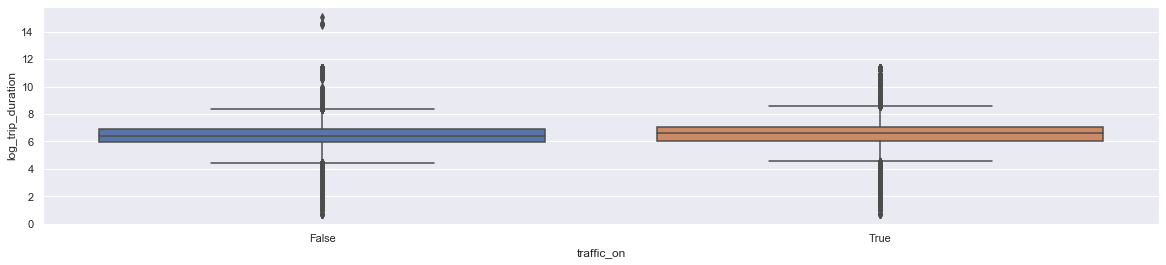

In [44]:
sns.boxplot(x='traffic_on', y='log_trip_duration', data=X_train)

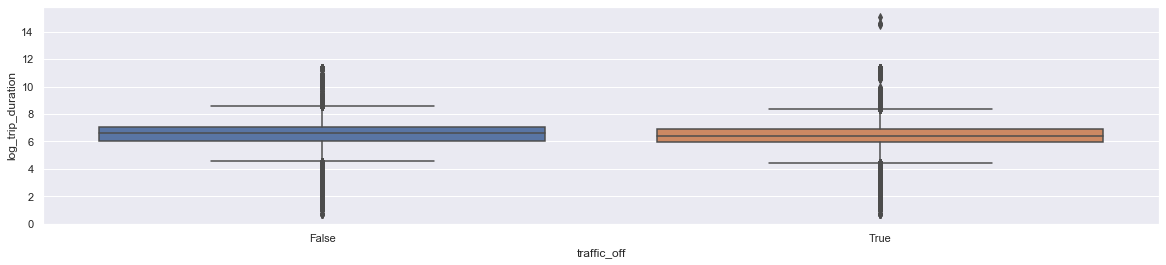

In [45]:
sns.boxplot(x='traffic_off', y='log_trip_duration', data=X_train)

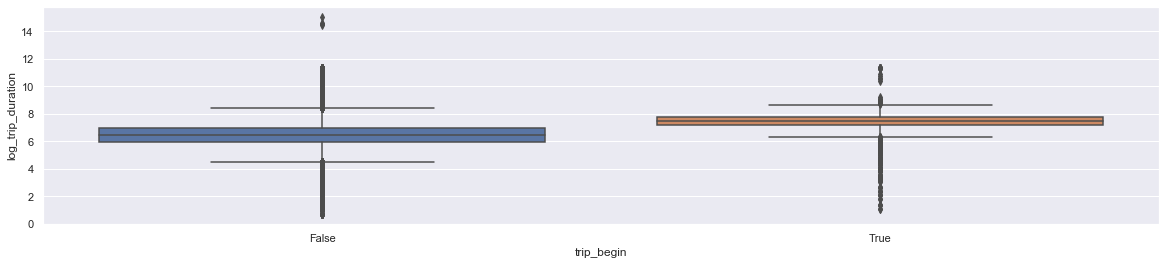

In [46]:
sns.boxplot(x='trip_begin', y='log_trip_duration', data=X_train)

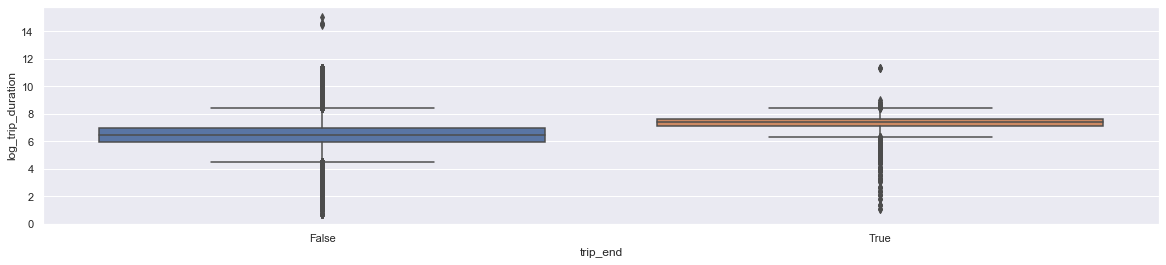

In [47]:
sns.boxplot(x='trip_end', y='log_trip_duration', data=X_train)

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Все графики примерно одинаковые, поэтому я думаю что не особо

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.left_down_first = 40.71
        self.left_down_second = -74.021
        self.right_up_first = 40.797
        self.right_up_second = -73.94
        self.it_first = 50
        self.it_second = 40
        self.width = abs(self.left_down_first - self.right_up_first)
        self.height = abs(self.left_down_second - self.right_up_second)
        self.max = self.it_first * self.it_second
        
    def fit(self, X, y=None):
        return self
        
    def it_num(self, lat, lng):
        x = ((lat - self.left_down_first) // (self.width / self.it_second))
        y = abs((lng - self.left_down_second) // (self.height / self.it_first))
        it = x * self.it_second + y
        return it
    
    def transform(self, X, **transform_params):
        Xn = X.loc[:, :]
        Xn['pickup_item'] = self.it_num(X.pickup_latitude, X.pickup_longitude)
        Xn['dropoff_item'] = self.it_num(X.dropoff_latitude, X.dropoff_longitude)
        return Xn
#я пытался, но с классами беда(

In [49]:
X_train['map'] = 0
X_test['map'] = 0
X_train['map'] = MapGridTransformer().transform(X_train)
X_test['map'] = MapGridTransformer().transform(X_test)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [50]:
x_train = X_train.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days', 
                          'traffic_on', 'traffic_off', 'trip_begin', 'trip_end']]
x_test = X_test.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days', 
                          'traffic_on', 'traffic_off', 'trip_begin', 'trip_end']]

In [51]:
categorical = ['day_of_week', 'month_of_year', 'abnormal_winter', 'abnormal_spring', 
               'traffic_on', 'traffic_off', 'trip_begin', 'trip_end', ]
numeric_features = ['hour_of_day', 'days']

In [52]:
model = Ridge()
model.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test RMSE = %.4f" % mean_squared_error(Y_test_log, y_pred))
print("Train RMSE = %.4f" % mean_squared_error(Y_train_log, y_train_pred))

Test RMSE = 0.6080
Train RMSE = 0.6110


In [53]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test_log, y_pred))

Test MSE = 0.6062


Так как с классами беда, то можно сделать вывод что 4 новых признака не сыграли особой роли

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: от этого признака - `store_and_fwd_flag` может многое зависеть, так как если с машиной что-то случилось, то время поездки существенно увеличится

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [54]:
set(X_train['vendor_id'])

{1, 2}

In [55]:
set(X_train['passenger_count'])

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [56]:
set(X_train['store_and_fwd_flag'])

{'N', 'Y'}

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

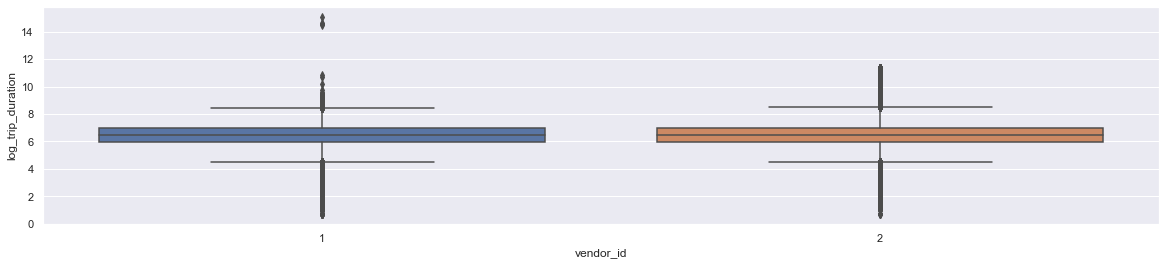

In [57]:
sns.boxplot(x='vendor_id', y='log_trip_duration', data=X_train)

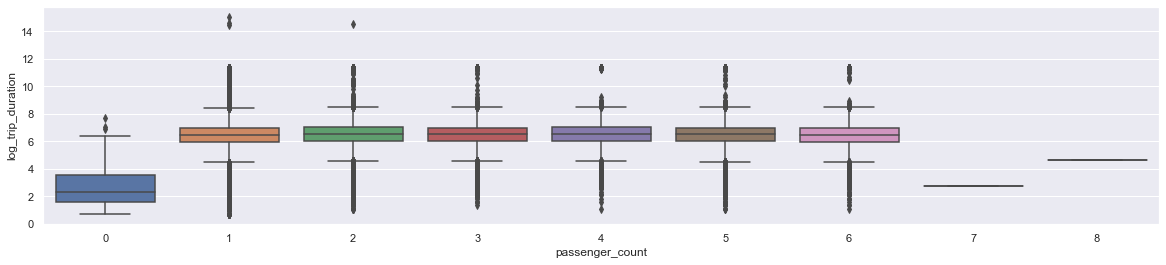

In [58]:
sns.boxplot(x='passenger_count', y='log_trip_duration', data=X_train)

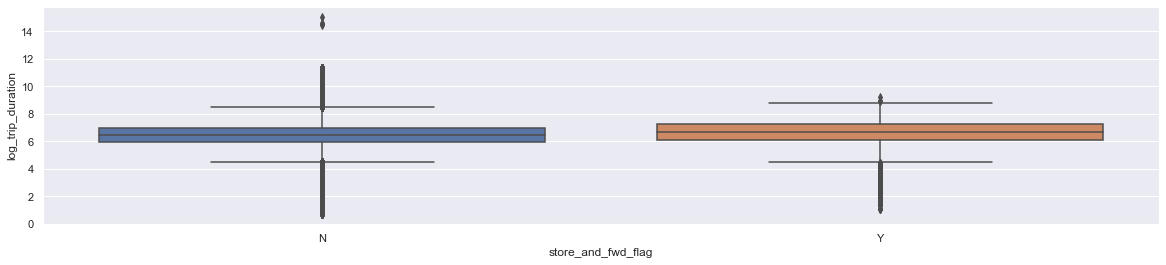

In [59]:
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=X_train)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [60]:
X_train.loc[X_train['vendor_id'] == 1, 'vendor_id'] = 0
X_train.loc[X_train['vendor_id'] == 2, 'vendor_id'] = 1

X_test.loc[X_test['vendor_id'] == 1, 'vendor_id'] = 0
X_test.loc[X_test['vendor_id'] == 2, 'vendor_id'] = 1

In [61]:
X_train.loc[X_train['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 1
X_train.loc[X_train['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 0

X_test.loc[X_test['store_and_fwd_flag'] == 'N', 'store_and_fwd_flag'] = 1
X_test.loc[X_test['store_and_fwd_flag'] == 'Y', 'store_and_fwd_flag'] = 0

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Я думаю особой роли признаки не сыграют, самый мощный из них - 'store_and_fwd_flag', так как он описывает состояние машины

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [62]:
x_train = X_train.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days', 
                          'traffic_on', 'traffic_off', 'trip_begin', 'trip_end', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]
x_test = X_test.loc[:, ['day_of_week', 'month_of_year', 'hour_of_day',
                          'abnormal_winter', 'abnormal_spring', 'days', 
                          'traffic_on', 'traffic_off', 'trip_begin', 'trip_end', 'vendor_id', 'passenger_count', 'store_and_fwd_flag']]

In [63]:
categorical = ['day_of_week', 'month_of_year', 'abnormal_winter', 'abnormal_spring', 
               'traffic_on', 'traffic_off', 'trip_begin', 'trip_end', 'vendor_id', 'store_and_fwd_flag']
numeric_features = ['hour_of_day', 'days', 'passenger_count']

In [64]:
model = Ridge()
model.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

print("Test RMSE = %.4f" % mean_squared_error(Y_test_log, y_pred))
print("Train RMSE = %.4f" % mean_squared_error(Y_train_log, y_train_pred))

Test RMSE = 0.6074
Train RMSE = 0.6105


In [65]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(x_train, Y_train_log)
y_pred = model.predict(x_test)
print("Test MSE = %.4f" % mean_squared_error(Y_test_log, y_pred))

Test MSE = 0.6057


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [66]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [67]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [68]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [69]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [71]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [73]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [74]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [75]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [76]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.